<a href = "https://www.pieriantraining.com"><img src="../PT Centered Purple.png"> </a>

<em style="text-align:center">Copyrighted by Pierian Training</em>

# MultiVariate Time Series Forecasting - Known Covariates

A known covariates means we know the exact times the exogenous event will occur in the future, for example, we know future holidays and the dates they will land on. We can use this information to help forecast things like holiday sale cycles.

## Imports

In [73]:
from autogluon.timeseries import TimeSeriesDataFrame,TimeSeriesPredictor
import pandas as pd

In [74]:
df = pd.read_csv("data/RestaurantVisitors.csv")

In [75]:
df.head()

,weekday,holiday,holiday_name,total,timestamp,item_id
0,Friday,1,New Year's Day,296.0,1/1/2016,Restaurant_Visitors
1,Saturday,0,na,191.0,1/2/2016,Restaurant_Visitors
2,Sunday,0,na,202.0,1/3/2016,Restaurant_Visitors
3,Monday,0,na,105.0,1/4/2016,Restaurant_Visitors
4,Tuesday,0,na,98.0,1/5/2016,Restaurant_Visitors


In [76]:
df.tail()

,weekday,holiday,holiday_name,total,timestamp,item_id
512,Saturday,0,na,NaN,5/27/2017,Restaurant_Visitors
513,Sunday,0,na,NaN,5/28/2017,Restaurant_Visitors
514,Monday,1,Memorial Day,NaN,5/29/2017,Restaurant_Visitors
515,Tuesday,0,na,NaN,5/30/2017,Restaurant_Visitors
516,Wednesday,0,na,NaN,5/31/2017,Restaurant_Visitors


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   total         478 non-null    float64
 4   timestamp     517 non-null    object 
 5   item_id       517 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.4+ KB


**Convert Weekday String to Numeric indicator**

Its up to you if you want to use AutoGluon for this or Pandas:

In [78]:
datetimes = pd.to_datetime(df['timestamp'])
datetimes.dt.day_of_week

0      4
1      5
2      6
3      0
4      1
      ..
512    5
513    6
514    0
515    1
516    2
Name: timestamp, Length: 517, dtype: int64

In [79]:
df['dow'] = datetimes.dt.day_of_week
df = df.drop('weekday',axis=1)

We also don't need the holiday_name.

In [80]:
df = df.drop('holiday_name',axis=1)

In [81]:
df.head()

,holiday,total,timestamp,item_id,dow
0,1,296.0,1/1/2016,Restaurant_Visitors,4
1,0,191.0,1/2/2016,Restaurant_Visitors,5
2,0,202.0,1/3/2016,Restaurant_Visitors,6
3,0,105.0,1/4/2016,Restaurant_Visitors,0
4,0,98.0,1/5/2016,Restaurant_Visitors,1


In [82]:
df.tail()

,holiday,total,timestamp,item_id,dow
512,0,NaN,5/27/2017,Restaurant_Visitors,5
513,0,NaN,5/28/2017,Restaurant_Visitors,6
514,1,NaN,5/29/2017,Restaurant_Visitors,0
515,0,NaN,5/30/2017,Restaurant_Visitors,1
516,0,NaN,5/31/2017,Restaurant_Visitors,2


Let's save these results:

In [83]:
df.iloc[:478].to_csv("data/Historical_Restaurant_Visitors",index=False)

In [84]:
df.iloc[478:][['dow','holiday','timestamp','item_id']].to_csv("data/Known_Future_Covariants",index=False)

In [85]:
forecast_periods = 517-478

In [86]:
forecast_periods

39

### TimeSeriesDataFrame

In [87]:
train_data = TimeSeriesDataFrame('data/Historical_Restaurant_Visitors')

Loaded data from: data/Historical_Restaurant_Visitors | Columns = 5 / 5 | Rows = 478 -> 478


In [88]:
train_data

holiday  total  dow
item_id             timestamp                      
Restaurant_Visitors 2016-01-01        1  296.0    4
                    2016-01-02        0  191.0    5
                    2016-01-03        0  202.0    6
                    2016-01-04        0  105.0    0
                    2016-01-05        0   98.0    1
...                                 ...    ...  ...
                    2017-04-18        0   91.0    1
                    2017-04-19        0   79.0    2
                    2017-04-20        0   90.0    3
                    2017-04-21        0  165.0    4
                    2017-04-22        0  226.0    5

[478 rows x 3 columns]

## Predictor Object

In [89]:
predictor = TimeSeriesPredictor(
    prediction_length=39,
    target="total",
    known_covariates_names=["dow","holiday"]) 

No path specified. Models will be saved in: "AutogluonModels\ag-20230403_195350\"


In [90]:
predictor.fit(train_data)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 39,
 'random_seed': None,
 'target': 'total',
 'time_limit': None}
Provided training data set with 478 rows, 1 items (item = single time series). Average time series length is 478.0.
Training artifacts will be saved to: C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\02-Time-Series-Forecasting\AutogluonModels\ag-20230403_195350
AutoGluon will save models to AutogluonModels\ag-20230403_195350\
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'total'
	known covariates: ['dow', 'holiday

# Predictions

In [93]:
known_covariates = TimeSeriesDataFrame('data/Known_Future_Covariants')

Loaded data from: data/Known_Future_Covariants | Columns = 4 / 4 | Rows = 39 -> 39


In [94]:
known_covariates

dow  holiday
item_id             timestamp               
Restaurant_Visitors 2017-04-23    6        0
                    2017-04-24    0        0
                    2017-04-25    1        0
                    2017-04-26    2        0
                    2017-04-27    3        0
                    2017-04-28    4        0
                    2017-04-29    5        0
                    2017-04-30    6        0
                    2017-05-01    0        0
                    2017-05-02    1        0
                    2017-05-03    2        0
                    2017-05-04    3        0
                    2017-05-05    4        1
                    2017-05-06    5        0
                    2017-05-07    6        0
                    2017-05-08    0        0
                    2017-05-09    1        0
                    2017-05-10    2        0
                    2017-05-11    3        0
                    2017-05-12    4        0
                    2017-05-13    5        0
                    2017-05-14    6        1
                    2017-05-15    0        0
                    2017-05-16    1        0
                    2017-05-17    2        0
                    2017-05-18    3        0
                    2017-05-19    4        0
                    2017-05-20    5        0
                    2017-05-21    6        0
                    2017-05-22    0        0
                    2017-05-23    1        0
                    2017-05-24    2        0
                    2017-05-25    3        0
                    2017-05-26    4        0
                    2017-05-27    5        0
                    2017-05-28    6        0
                    2017-05-29    0        1
                    2017-05-30    1        0
                    2017-05-31    2        0

In [96]:
predictions = predictor.predict(train_data, known_covariates=known_covariates)

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [98]:
predictions

mean         0.1         0.2  \
item_id             timestamp                                        
Restaurant_Visitors 2017-04-23  170.778464  140.506338  150.805445   
                    2017-04-24   85.738142   56.566362   66.864652   
                    2017-04-25   97.353162   67.590798   77.941545   
                    2017-04-26   99.593656   70.063097   80.813836   
                    2017-04-27   99.974743   70.308017   81.078260   
                    2017-04-28  149.144224  117.809676  128.287761   
                    2017-04-29  234.919508  200.941270  212.788395   
                    2017-04-30  179.088821  147.761834  158.158010   
                    2017-05-01   90.014518   60.535015   70.657808   
                    2017-05-02   92.254561   62.202584   73.117800   
                    2017-05-03  102.068549   71.437990   82.653961   
                    2017-05-04   99.261307   69.703036   79.573257   
                    2017-05-05  150.976244  114.447939  127.825364   
                    2017-05-06  211.166907  175.890322  188.798134   
                    2017-05-07  164.540636  133.088085  144.518137   
                    2017-05-08   81.871885   51.346014   62.145813   
                    2017-05-09   86.587330   58.077928   68.074574   
                    2017-05-10   95.936957   65.385373   76.804500   
                    2017-05-11  101.237724   69.761266   81.203726   
                    2017-05-12  141.430744  108.333182  120.399197   
                    2017-05-13  237.722923  200.872796  214.287667   
                    2017-05-14  192.696181  159.020472  170.744976   
                    2017-05-15   88.676217   56.493251   67.431363   
                    2017-05-16   89.714967   59.875453   70.020510   
                    2017-05-17   98.897730   68.539038   78.775276   
                    2017-05-18   99.212645   67.657771   78.701603   
                    2017-05-19  141.077571  108.677741  119.337426   
                    2017-05-20  236.985731  202.404463  213.878686   
                    2017-05-21  176.698335  146.230310  156.469598   
                    2017-05-22   89.034839   59.634020   69.825868   
                    2017-05-23   93.098910   62.680759   73.449662   
                    2017-05-24  101.440901   71.413418   81.876831   
                    2017-05-25  107.508303   76.311282   87.998925   
                    2017-05-26  149.481343  117.734236  128.610213   
                    2017-05-27  238.691579  202.987789  216.359631   
                    2017-05-28  170.917739  139.394266  150.307460   
                    2017-05-29  114.743719   83.543067   94.478509   
                    2017-05-30  111.719751   80.507183   91.792675   
                    2017-05-31   97.964847   67.667530   78.197720   

                                       0.3         0.4         0.5  \
item_id             timestamp                                        
Restaurant_Visitors 2017-04-23  158.545748  164.994691  170.744036   
                    2017-04-24   74.149104   80.208512   85.895517   
                    2017-04-25   85.368073   91.472037   97.213243   
                    2017-04-26   87.813609   93.978704   99.676340   
                    2017-04-27   88.299892   94.644999  100.151089   
                    2017-04-28  136.065498  142.450509  148.884752   
                    2017-04-29  221.366848  228.675071  235.289415   
                    2017-04-30  165.843679  172.440884  178.716030   
                    2017-05-01   77.742336   84.082571   89.694786   
                    2017-05-02   80.740149   86.774768   92.520435   
                    2017-05-03   90.154384   96.307365  102.131594   
                    2017-05-04   86.727881   93.426319   99.278188   
                    2017-05-05  136.773281  144.142720  151.239760   
                    2017-05-06  197.381314  205.030026  211.438556   
                    2017-05-07  151.933217  158

## Visualize Predictions

In [101]:
import matplotlib.pyplot as plt

In [104]:
def plot_predictions(train_data,predictions,item_id,target_col):
    plt.figure(figsize=(20, 3),dpi=150)
    # Y PREDICTIONS
    y_pred = predictions.loc[item_id]
    # HISTORICAL Y VALUES
    y_past = train_data.loc[item_id][target_col]
    
    # PLOT HISTORICAL VALUES AGAINST BEST MODEL'S PREDICTIONS
    plt.plot(y_past, label="Known Past Historical Values")
    plt.plot(y_pred["mean"], label="Mean Forecast")
    
    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
    )

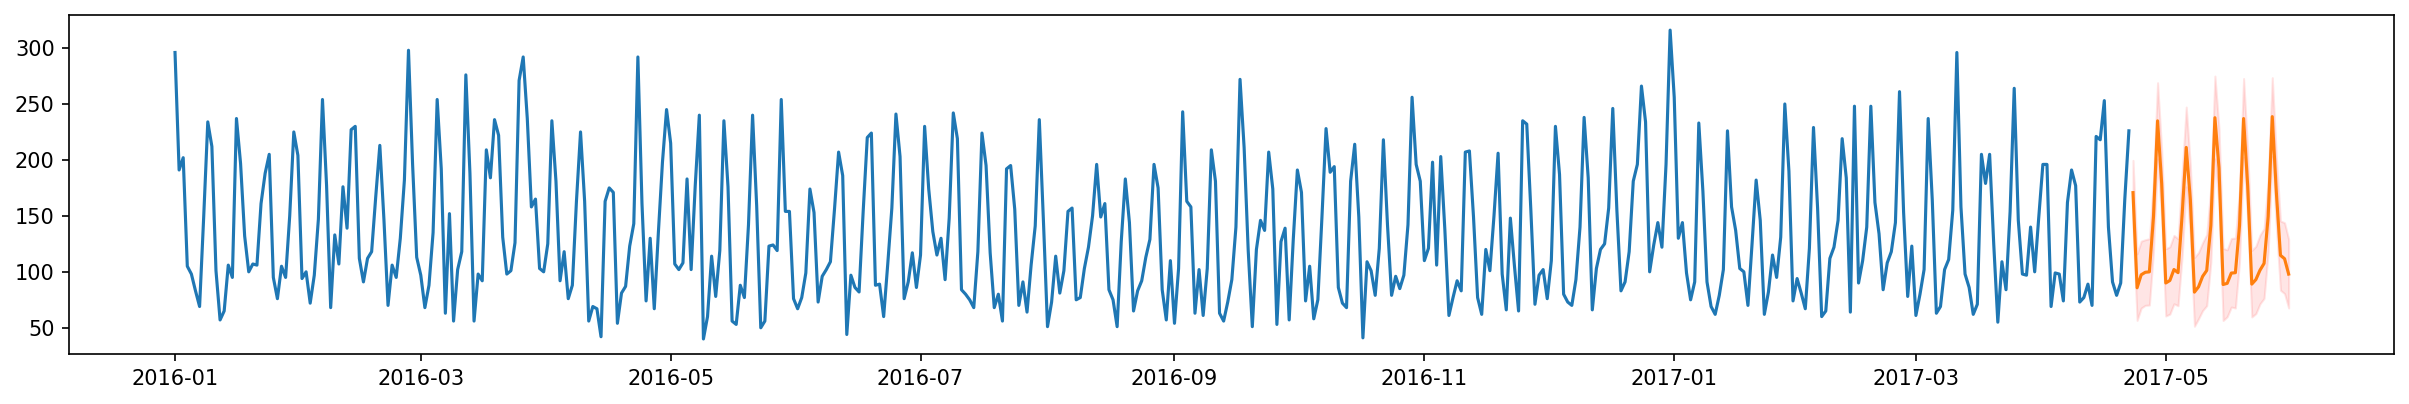

In [105]:
plot_predictions(train_data=train_data,predictions=predictions,item_id='Restaurant_Visitors',target_col='total')